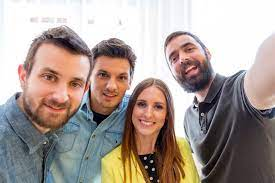

All outputs saved successfully!


In [10]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import os

# Create a temporary folder to save the outputs
temp_folder = 'temp_folder'
os.makedirs(temp_folder, exist_ok=True)

# 1) Read image
image_path = '/content/drive/MyDrive/Assignment no.2/Group.jpeg.jpg'
image = cv2.imread(image_path)

# 2) Show image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 3) Convert image into Gray, Blur, Canny, Dilation & Eroded image
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur_image = cv2.GaussianBlur(image, (7, 7), 0)
canny_image = cv2.Canny(image, 100, 150)
dilated_image = cv2.dilate(image, np.ones((5, 5), np.uint8), iterations=3)
eroded_image = cv2.erode(image, np.ones((5, 5), np.uint8), iterations=3)

# Save the converted images
cv2.imwrite(os.path.join(temp_folder, 'gray_image.jpg'), gray_image)
cv2.imwrite(os.path.join(temp_folder, 'blur_image.jpg'), blur_image)
cv2.imwrite(os.path.join(temp_folder, 'canny_image.jpg'), canny_image)
cv2.imwrite(os.path.join(temp_folder, 'dilated_image.jpg'), dilated_image)
cv2.imwrite(os.path.join(temp_folder, 'eroded_image.jpg'), eroded_image)

# 4) Resize image into: (i) Smaller than original & (ii) Up to screen size
smaller_image = cv2.resize(image, (int(image.shape[1]/2), int(image.shape[0]/2)))
screen_size = (1920, 1080)  # Change this to your screen size
resized_image = cv2.resize(image, screen_size)

# Save the resized images
cv2.imwrite(os.path.join(temp_folder, 'smaller_image.jpg'), smaller_image)
cv2.imwrite(os.path.join(temp_folder, 'resized_image.jpg'), resized_image)

# 5) Cropping of image
crop_image = image[100:400, 200:500]

# Save the cropped image
cv2.imwrite(os.path.join(temp_folder, 'crop_image.jpg'), crop_image)

# 6) Insertion of shapes (rectangle & circle) in the given image
rectangle_image = image.copy()
cv2.rectangle(rectangle_image, (200, 100), (500, 400), (0, 255, 0), 2)

circle_image = image.copy()
cv2.circle(circle_image, (350, 250), 150, (0, 0, 255), 2)

# Save the images with shapes
cv2.imwrite(os.path.join(temp_folder, 'rectangle_image.jpg'), rectangle_image)
cv2.imwrite(os.path.join(temp_folder, 'circle_image.jpg'), circle_image)

# 7) Join two & three different images
image1 = cv2.imread('/content/drive/MyDrive/Assignment no.2/dog.png')
image2 = cv2.imread('/content/drive/MyDrive/Assignment no.2/lambo.png')
image3 = cv2.imread('/content/drive/MyDrive/Assignment no.2/tree.png')

# Resize the images to have the same height
height = min(image1.shape[0], image2.shape[0], image3.shape[0])
width = int(height * (image1.shape[1] / image1.shape[0]))
image1 = cv2.resize(image1, (width, height))
image2 = cv2.resize(image2, (width, height))
image3 = cv2.resize(image3, (width, height))

# Combine two images horizontally
combined_h = np.hstack((image1, image2))

# Combine three images vertically
combined_v = np.vstack((image1, image2, image3))

# Save the combined images
cv2.imwrite(os.path.join(temp_folder, 'combined_h.jpg'), combined_h)
cv2.imwrite(os.path.join(temp_folder, 'combined_v.jpg'), combined_v)

# 8) Face detection on the given image of a group
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2.imwrite(os.path.join(temp_folder, 'face_detection.jpg'), image)

# 9) Read and save the video given
video_path = 'path/to/video.mp4'
cap = cv2.VideoCapture(video_path)

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame here (if needed)
    
    # Save the frame
    cv2.imwrite(os.path.join(temp_folder, f'frame{frame_count}.jpg'), frame)
    frame_count += 1

cap.release()

print('All outputs saved successfully!')